### <center><font size=5> (Bio)Statistics in R: Part #1</font></center>

***

**author**: Ruslan Klymentiev

**date**: 30th July, 2018

![](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_BiostatisticsBasics/BiostatisticsWordle.jpg)

- <a href='#intro'>Project Introduction</a>  
- <a href='#setup'>Setting up the Environment</a>
- <a href='#probthnk'>Probabilistic Thinking</a>
 - <a href='#exp'>Experiments</a>
 - <a href='#prob'>Probability</a>
 - <a href='#rv'>Random Variables</a>
 - <a href='#chardist'>Main Characteristics of Distribution</a>
 - <a href='#condprob'>Conditional Probability</a>
 - <a href='#bayes'>Bayes Rule</a>
 - <a href='#roc'>ROC and AUC</a>
- <a href='#stroke'>Healthcare Dataset Stroke Data</a>
 - <a href='#eda'>EDA (Exploratory Data Analysis)</a> 
 - <a href='#outcome'>Test Outcome Analysis</a> 
- <a href='#nextpart'>What to Expect Next</a>

## <a id='intro'>Project Introduction</a> 

This project is sort of "notes" for myself to make sure I got the topic and also a way to share knowledge with others. These are the resourses I found extremely useful for myself:

* [Mathematical Biostatistics Boot Camp 1](https://www.coursera.org/learn/biostatistics/) & [Mathematical Biostatistics Boot Camp 2](https://www.coursera.org/learn/biostatistics-2) courses on Coursera;

* Book related to Coursera course: [Methods in Biostatistics with R](https://leanpub.com/biostatmethods);

* [Biostatistics and Epidemiology Lecture Series](https://www.youtube.com/playlist?list=PL8NkkvvWlbpQJsQogbwo_ylI5YlIGwkst) on YouTube.


**What does 'biostatistics' actually mean?**

>**Biostatistics** is the application of statistics to a wide range of topics in biology. It encompasses the design of biological experiments, especially in medicine, pharmacy, agriculture and fishery; the collection, summarization, and analysis of data from those experiments; and the interpretation of, and inference from, the results. A major branch is medical biostatistics, which is exclusively concerned with medicine and health.

> *Source: [Wikipedia](https://en.wikipedia.org/wiki/Biostatistics)*

Despite the name *biostatistics*, mostly all of the methods I will discuss here can be applied in any area, not just medical or health related. 

## <a id='setup'>Setting up the environment</a> 

In [69]:
library(tidyverse)
library(repr)
library(randomForest)
library(caret)
library(cowplot)
library(Metrics)
library(AUC)
set.seed(123)
options(repr.plot.width=7, repr.plot.height=3)

## <a id='probthnk'>Probabilistic Thinking</a> 

> Probabilistic thinking is essentially trying to estimate, using some tools of math and logic, the likelihood of any specific outcome coming to pass. It is one of the best tools we have to improve the accuracy of our decisions. In a world where each moment is determined by an infinitely complex set of factors, probabilistic thinking helps us identify the most likely outcomes. When we know these our decisions can be more precise and effective.

> *Source: [Farnam Street](https://fs.blog/2018/05/probabilistic-thinking/)*

And of course theory comes first:

### <a id='exp'>Experiments</a> 

* **Sample space** $\Omega$ is collection of possible outcomes of the experiment. 

* **Event** $E$ is a subset of sample space $\Omega$.

* **Elementary** or **simple event** $\omega$ is a specific result of an experiment.

* $\emptyset$ is emty set or null event.

* $\omega \in E$: $E$ occurs when $\omega$ occurs.

* $\omega \notin E$: $E$ doesn't occur when $\omega$ occurs. 

* $E \subset F$: occurance of $E$ implies the occurance of $F$ ($E$ is subset of $F$).

* $E \cap F$: event that both $F$ and $E$ events occur (intersection). **R function: `E & F`**

* $E \cap F=\emptyset$: $E$ and $F$ mutually exclusive (cannot both occur).

* $E \cup F$: at least one of $E$ or $F$ occur (union). **R function: `E | F`**

* $E^C$ or $\bar{E}$: $E$ compliment (event $E$ doesn't occur). **R function: `!E`**

* $E$ \ $F=E \cap F^C$: the event that $E$ occurs and $F$ does not occur.

**Let's look at some examples in R with coin flips so it will make more sense.**

We assume that coin is fair and the distribution of oucomes falls under binomial distribution with chance of getting heads = 0.5.

>A binomial experiment is a statistical experiment that has the following properties: The experiment consists of n repeated trials. Each trial can result in just two possible outcomes. We call one of these outcomes a success and the other, a failure. The probability of success, denoted by P, is the same on every trial.

In [2]:
# Generate two sample spaces for 10 coins, flip each coin 1 time. Event E = 1 (heads) with probability .5
Exp_A  <- rbinom(10, 1, .5)
Exp_B  <- rbinom(10, 1, .5)

print(paste0("Sample space of experiment A: ", list(Exp_A)))
print(paste0("Sample space of experiment B: ", list(Exp_B)))
cat("\n")
print(paste0("E compliment (tails flip) for sample A: ", list(!Exp_A)))
print(paste0("E compliment (tails flip) for sample B: ", list(!Exp_B)))
cat("\n")
print(paste0("Coin flip is 'heads' (1) for both sample A and B: ",
             list(Exp_A & Exp_B)))
print(paste0("Coin flip is 'heads' (1) for either sample A or B: ",
             list(Exp_A | Exp_B)))
cat("\n")
print(paste0("Coin flip is 'heads' (1) for sample A when B is 'tails': ",
             list(Exp_A & !Exp_B)))

[1] "Sample space of experiment A: c(0, 1, 0, 1, 1, 0, 1, 1, 1, 0)"
[1] "Sample space of experiment B: c(1, 0, 1, 1, 0, 1, 0, 0, 0, 1)"

[1] "E compliment (tails flip) for sample A: c(TRUE, FALSE, TRUE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, TRUE)"
[1] "E compliment (tails flip) for sample B: c(FALSE, TRUE, FALSE, FALSE, TRUE, FALSE, TRUE, TRUE, TRUE, FALSE)"

[1] "Coin flip is 'heads' (1) for both sample A and B: c(FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE)"
[1] "Coin flip is 'heads' (1) for either sample A or B: c(TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE)"

[1] "Coin flip is 'heads' (1) for sample A when B is 'tails': c(FALSE, TRUE, FALSE, FALSE, TRUE, FALSE, TRUE, TRUE, TRUE, FALSE)"


*Note how R converts `0` to `FALSE` and `1` to `TRUE` and vice versa.*

### <a id='prob'>Probability</a> 

**Probability** is simply likelihood that event will take place.

In [3]:
print(paste0("Probability that it is 'heads' for both experiment A and B: ", 
             round(mean(Exp_A & Exp_B), 3)))
print(paste0("Probability that it is 'heads' for either experiment A or B ", 
             round(mean(Exp_A | Exp_B), 3)))
print(paste0("Probability that it is 'heads' for experiment A when it is 'tails' for experiment B: ", 
             round(mean(Exp_A & !(Exp_B)), 3)))

[1] "Probability that it is 'heads' for both experiment A and B: 0.1"
[1] "Probability that it is 'heads' for either experiment A or B 1"
[1] "Probability that it is 'heads' for experiment A when it is 'tails' for experiment B: 0.5"


### <a id='rv'>Random Variables</a> 

**Random variable** is a numerical outcome of an experiment. Our focus will be on *discrete* and *continuous* random variables.

* **Discrete random variables** are the variables that can take only countable number of possibilities (for example, does patient suffers from Heart disease (yes/no)?).

* **continuous random variables** are the variables that can take infinitely many values (for example, Average Glucose Level for patient).

#### Probability Mass Function

> A **probability mass function (PMF)** is a function that gives the probability that a **discrete** random variable is exactly equal to some value.

For the coin example the PMF with look like this: $p(x)=\theta^x(1 - \theta)^{1-x}$,

where $\theta$ is probability of getting 1 (heads), $x$ - takes 1 (heads) or 0 (tails).

For fair coin PMF will look as follows: $p(x)=(\frac{1}{2})^x(\frac{1}{2})^{1-x}$.

To be a valid PMF, a function $p(x)$ must satisfy:

* $p(k) \geqslant 0 $ for all $k \in K$, where $K$ is the set of all possible outcomes for $X$;

* $\sum_{k\in{K}} p(k) = 1$.

#### Probability Density Function

> **Probability Density Function** is a function of a **continuous** random variable, whose integral across an interval gives the probability that the value of the variable lies within the same interval.

For example we have a distribution which follows density like: $f(x)=\frac{x^4}{3}$, for $x \in (0;2)$

To be a valid PDF, the function $f(x)$ must satisfy:

* $f(x) \geqslant 0$ for all $x$;

* $\int\limits_{-\infty}^\infty (x) \,dx = 1$.

#### Independent Events

$E$ and $F$ are independent if: $P(E \cap F)=P(E)P(F)$

### <a id='chardist'>Main Characteristics of Distribution</a>

#### Expected Value

**Mean** (or expected value) is the center of mass of distribution or simply saying it is the average of set of variables. 

* For **discrete** RV with PMF $p(x)$ it is defined as follows: $E[X]=\sum_x xp(x)$.

* For **continuous** RV with PDF $f(x)$ it is defined as follows: $E[X]=\int\limits_{-\infty}^{\infty} xf(x)\,dx$.

You could hear terms like *population mean* and *sample mean*. What's the difference?. For example, you want to check duration of time from first exposure to HIV infection to AIDS diagnosis, so your *population* is going to be *every* human who had exposure to HIV. It is not possible to get that information, but what you could is gather information about some people (*sample*) and then make assumptions about population based on information about the sample.

![](http://www.snapsurveys.com/blog/wp-content/uploads/2011/08/target-population.jpg)

* **Sample mean** can be defined as follows: $\bar{X}=\frac{1}{n}\sum_{1}^{n}X_i$

#### Variance

**Variance** tells how data points in a specific distribution are spread out. It is the average of the distances from each data point in the distribution to the mean, squared.

* If $X$ is a **discrete** random variable with PMF $p(x) = P(X = x)$, then: 
    \begin{align}
    Var(X)=\sum_{x}(x-\mu)^2p(x)
    \end{align}
    
    where $\mu$ is the mean.
    
* If $X$ is a **continuous** random variable with PDF $f(x)$, then: 
    \begin{align}
    Var(X)=\int\limits_{-\infty}^\infty (x-\mu)^2f(x) \,dx
    \end{align}
    
* If $X_i$, $i\in[1;n]$ are random variables with variance $\sigma^2$ the **sample variance** is defined as:
    \begin{align}
    s^2=\frac{\sum_{i=1}^{n}(X_i-\bar{X})^2}{n-1}
    \end{align}

#### Standard deviation

**Standard deviation** is defined as the square root of the variance. It also tells about variation of data points from the mean. The key defference is that standard deviation is in the same units as the data in disctribution which makes it easy to interpret. 
    \begin{align}
    sd(X)=\sqrt{Var(X)}
    \end{align}
    
**Sample Standard deviation:** $s=\sqrt{s^2}$

#### Median    

**Median** tells where the middle of **sorted** dataset is (.5 quantile). 

For example we have dataset {1, 4, 5, 6, 1, 1, 5, 7, 120}. First we have to sort it ad then find the middle value {1, 1, 1, 4, **5**, 5, 6, 7, 120}. So the median is **5**.
     
Why sometimes it is better to use median instead of mean? Average value is very sensitive to *outliers* which can give a wrong interpretation of variables. For the dataset {1, 4, 5, 6, 1, 1, 5, 7, 120} the mean = **16.67** because of the value of 120. In this case we would rather use median to estimate average value of dataset.

#### Covariance and Correlation

**Covariance** is a measure of how much two random variables vary together.
\begin{align}
Cov(X_1,X_2)=E(X_1 X_2) - E(X_1)E(X_2)
\end{align}
Sample covariance (estimator of the true covariance): 
\begin{align}
\hat{Cov}(X_1, X_2) = \frac{1}{n}\sum_{i}^{n}(X_{1i} - \bar{X_1})(X_{2i} - \bar{X_2})
\end{align}

However, the covariance is hard to interpret. For example, the $Cov(X,Y)=200$ tells us that there is a relationship (correlation) between two variables $X$ and $Y$, but doesn't tell exactly how strong it is. That when it is usefull to use **correlation**

Correlation is defined as follows:
\begin{align}
Cor(X_1, X_2) = \frac{\hat{Cov}(X_1, X_2)}{\sqrt{Var(X_1)Var(X_2)}} = \frac{\hat{Cov}(X_1, X_2)}{sd(X_1)sd(X_2)}
\end{align}

\begin{align}
-1 \leqslant Cor(X_1, X_2) \leqslant 1
\end{align}

* If $Cor(X_1, X_2)=0$ - there is no relationship between variables $X_1$ and $X_2$.

* If $Cor(X_1, X_2)=1$ - there is a strong positive connection between $X_1$ and $X_2$. As $X_1$ increases $X_2$ also **increases**.

* If $Cor(X_1, X_2)=-1$ - there is a strong negative connection between $X_1$ and $X_2$. As $X_1$ increases $X_2$ **decreases**.

***
**Okay, that was a lot of theretical information. Let's look at the example:**

**The duration of time from first exposure to HIV infection to AIDS diagnosis is called the *incubation period*. The incubation periods of a random sample of 14 HIV infected individuals is given (in years).**

* Calculate the sample mean.

* Calculate the sample median.

* Calculate the sample standard deviation.

In [4]:
inc_period <- c(12.0, 10.5, 5.2, 9.5, 6.3, 13.1, 13.5, 12.5, 10.7, 7.2, 14.9, 6.5, 8.1, 7.9)

print(paste0("Sample mean: ", round(mean(inc_period), 3)))
print(paste0("Sample median: ", median(inc_period)))
print(paste0("Sample standard deviation: ", round(sd(inc_period), 3)))

[1] "Sample mean: 9.85"
[1] "Sample median: 10"
[1] "Sample standard deviation: 3.059"


What we can say about this numbers?

The average incubation period for the sample is 10 years. On average period varies by 3 years from that mean.

***
**Serum cholesterol (mmol/L) measured on a sample of 86 stroke patients (data of Markus et al., 1995). Calculate the distribution characteristics and plot the distribution.** 

In [5]:
cholesterol <- c(3.7,4.8,5.4,5.6,6.1,6.4,7.0,7.6,8.7,3.8,4.9,5.4,5.6,6.1,6.5,7.0,7.6,8.9,3.8,4.9,5.5,5.7,6.1,6.5,
                 7.1,7.6,9.3,  4.4,4.9,5.5,5.7,6.2,6.6,7.1,7.7,9.5,4.5,5.0,5.5,5.7,6.3,6.7,7.2,7.8,10.2,4.5,5.1,
                 5.6,5.8,6.3,6.7,7.3,7.8,10.4,4.5,5.1,5.6,5.8,6.4,6.8,7.4,7.8,4.7,5.2,5.6,5.9,6.4,6.8,7.4,8.2,4.7,
                 5.3,5.6,6.0,6.4,7.0,7.5,8.3,4.8,5.3,5.6,6.1,6.4,7.0,7.5,8.6)

print(paste0("Sample mean: ", round(mean(cholesterol), 3)))
print(paste0("Sample median: ", median(cholesterol)))
print(paste0("Sample variance: ", round(var(cholesterol), 3)))
print(paste0("Sample standard deviation: ", round(sd(cholesterol), 3)))

[1] "Sample mean: 6.341"
[1] "Sample median: 6.15"
[1] "Sample variance: 1.959"
[1] "Sample standard deviation: 1.4"


The average serum cholesterol level for the sample is 6.3 mmol/L. On average level varies by 1.4 years from the mean. 

**Let's visualize it now!**

**Histogram vs Boxplot**

Both of these two types of plot are useful for making sense out of data, but let's see what features each one has compared to other:

* **Histogram**. It shows the frequency of groups of data and you can see where are the most frequent values of you dataset. You can see the shape of your distribution and check if it skewed to any side.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Example_histogram.png/220px-Example_histogram.png)
    
* **Boxplot**. It shows the .25, .5, .75 quantiles of data, minimum and maximum values and also it is handy for outliers detection. 

![](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)

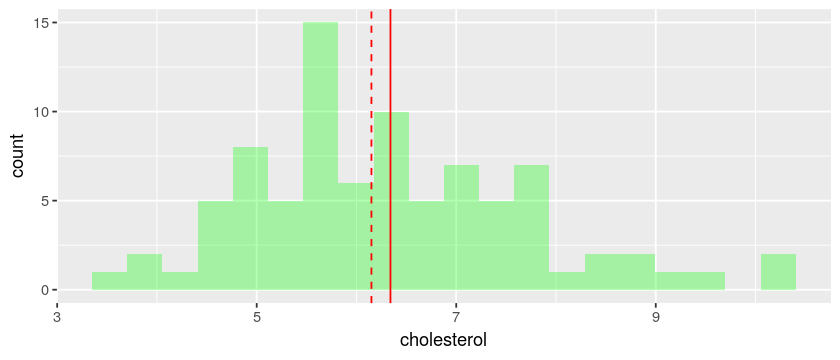

In [6]:
df <- data.frame(cholesterol)
ggplot(df, aes(x = cholesterol)) +
    geom_histogram(bins = 20, fill="green", alpha=0.3) +
    geom_vline(aes(xintercept=mean(cholesterol)), ## straight line for the mean
               colour = "red", size=0.5) + 
    geom_vline(aes(xintercept=median(cholesterol)), ## dashed line for the median
               colour = "red", linetype="dashed", size=0.5) 

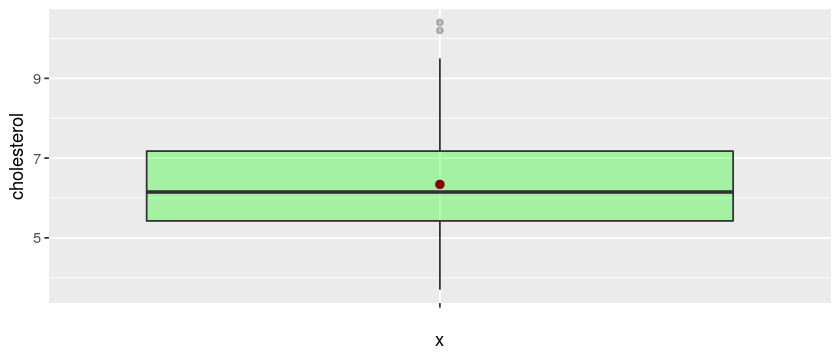

In [7]:
ggplot(df, aes(x = "", y = cholesterol)) +
    geom_boxplot(fill = "green", alpha = 0.3) +
    stat_summary(fun.y=mean, colour="darkred", geom="point", size=2) #red dot for the mean

***
**The data below show the consumption of alcohol (X, liters per year per person, 14 years or older) and
the death rate from cirrhosis, a liver disease (Y, death per 100,000 population) in 15 countries (each
country is an observation unit).**

* **Draw a Scatter Diagram to show the association, if any, between these two variables; can you draw any conclusion/observation without doing any calculation?**

* **Calculate the Coefficient of Covariance and Correlation.**

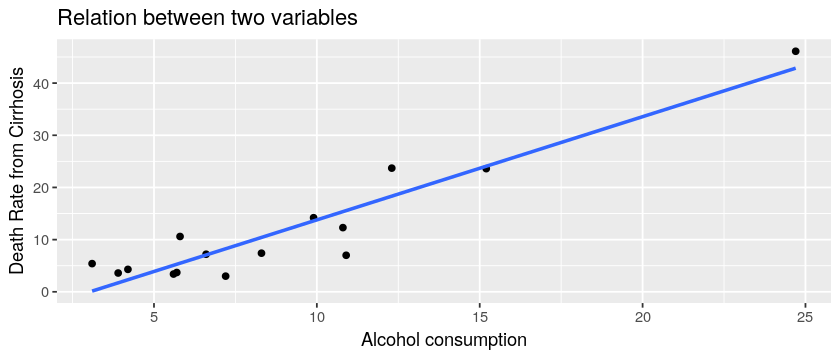

In [8]:
X <- c(24.7, 15.2, 12.3, 10.9, 10.8, 9.9, 8.3, 7.2, 6.6, 5.8, 5.7, 5.6, 4.2, 3.9, 3.1)
Y <- c(46.1, 23.6, 23.7, 7, 12.3, 14.2, 7.4, 3.0, 7.2, 10.6, 3.7, 3.4, 4.3, 3.6, 5.4)

df <- data.frame(X, Y)

## Good way to visualize the connection is to draw a scatter plot
ggplot(df, aes(x=X, y=Y)) + 
    geom_point() +
    geom_smooth(method=lm, se=FALSE) +
    labs(x = "Alcohol consumption",
         y = "Death Rate from Cirrhosis",
         title = "Relation between two variables")

It looks like we have strong postive correlation - as Alcohol consumption increases Death Rate from Cirrhosis also increases. Let's check foe coefficient to test our thoughts.

In [9]:
print(paste0("Covariance between Alcohol consumption and Death Rate from Cirrhosis: ", round(cov(X, Y), 2)))
print(paste0("Correlation between Alcohol consumption and Death Rate from Cirrhosis: ", round(cor(X, Y), 2)))

[1] "Covariance between Alcohol consumption and Death Rate from Cirrhosis: 60.68"
[1] "Correlation between Alcohol consumption and Death Rate from Cirrhosis: 0.94"


We were right, correlation is 0.94, so we can assume the relationship between Alcohol consumption and Death Rate from Cirrhosis.

### <a id='condprob'>Conditional Probability</a>

Imagine you want to measure the probability of occurance of event A given that event B has occured ($P(B)>0$).
\begin{align}
P(A|B)=\frac{P(A \cap B)}{P(B}
\end{align}
If $A$ and $B$ are independent:
\begin{align}
P(A|B)=P(A)
\end{align}

**Examples:**

**What is the probability of getting a certain illness between 0 and 30 years of age, if the likelihood of being of that age is 0.4, and the overall (marginal) probability (in the whole population) of getting this illness is 0.1?**

In [10]:
p_A <- .4
p_B <- .1
p_A_given_B <- p_A * p_B / p_B

print(paste0("Probability of getting a certain illness is: ", p_A_given_B))

[1] "Probability of getting a certain illness is: 0.4"


Thus we can say that this events are independent.

**There are 3 diseases, (A, B, C), which occur with probabilities 0.5, 0.3 and 0.2 respectively in people coming to an outpatient clinic. The probability of chest pain in these diseases is 0.8, 0.4 and 0.2 respectively. What is the probability that people at the outpatient clinic experience chest pain? What is the probability of disease C in a person who has no chest pain? **

In [11]:
p_A <- .5
p_B <- .3
p_C <- .2
p_cp_A <- .8
p_cp_B <- .4
p_cp_C <- .2

p_chest_pain <- p_A*p_cp_A + p_B*p_cp_B + p_C*p_cp_C
p_C_given_no_cp <- p_C*(1-p_cp_C)/(1-p_chest_pain)

print(paste0("Probability that people at the outpatient clinic experience chest pain: ", p_chest_pain))
print(paste0("Probability of disease C in a person who has no chest pain: ", round(p_C_given_no_cp,3)))

[1] "Probability that people at the outpatient clinic experience chest pain: 0.56"
[1] "Probability of disease C in a person who has no chest pain: 0.364"


### <a id='bayes'>Bayes Rule</a>

Bayes rule describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

\begin{align}
P(B|A)=\frac{P(A|B)P(B)}{P(A|B)P(B)+P(A|B^C)P(B^C)}
\end{align}

**Example with diagnostic test** *(taken from the book **Methods in Biostatistics with R**)*

* Let $+$ and $-$ be the events that the result of a diagnostic test is positive or negative respectively.

* Let $D$ and $D^C$ be the event that the subject of the test has or does not have a disease.

* The **sensitivity** is the probability that the test is positive given that the subject has the disease $P(+|D)$.

* The **specificity** is the probability that the test is negative given that the subject doesn't have the disease $P(-|D^C)$.

* **Positive predicted values** is the probability that the patient has the disease given that the test results are positive $P(D|+)$.

* **Negative predicted values** is the probability that the patient doesn't have the disease given that the test results are negative $P(D^C|-)$.

* **The likelihood ratio** gives an information of how much the odds of disease change based on a positive or a negative result.

    * **Diagnostic likelihood ratio of a postive test**
    \begin{align}
    DLR_+ = \frac{P(+|D)}{P(+|D^C)} = \frac{sensitivity}{1-specificity}
    \end{align}

    * **Diagnostic likelihood ratio of a negative test**
    \begin{align}
    DLR_- = \frac{P(-|D)}{P(-|D^C)} = \frac{1-sensitivity}{specificity}
    \end{align}

* **Prevalence** is a proportion of participants with the disease at a particular point of time.

* **Incidence** is a likelihood of developing a disease among people free of disease who are at risk of developing disease.

<img src="https://image.ibb.co/cqZ04T/Deepin_Screenshot_select_area_20180729205847.png">
<img src="https://image.ibb.co/g4eBB8/Deepin_Screenshot_select_area_20180729205900.png">

**A study comparing the efficacy of HIV tests concluded that HIV antibody tests have a sensitivity of 99.7% and a specificity of 98.5%. Suppose that a subject, from a population with a 0.1% prevalence of HIV, receives a positive test result. We are interested in calculating the probability that this subject has HIV. Mathematically, we would like to calculate $P(D+|T+)$, the probability of being HIV positive $(D+)$ given that one test was positive $(T+)$. What is known is the sensitivity of the test, $P(T+|D+)$ = 0.997, the specificity of the test, $P(T−|D−)$ = 0.985 and the prevalence of the disease in the target population, $P(D+)$ = 0.001. Using Bayes formula we can calculate the quantity that we are interested in.**

$P(T+|D+) = 0.997$

$P(T-|D-) = 0.985$

$P(T+|D+) = 0.997$

$P(T−|D−) = 0.985$

$P(D+) = 0.001$

$P(D+|T+)$ = $?$
\begin{align}
P(D+|T+)=\frac{P(T+|D+)P(D+)}{P(T+|D+)P(D+)+P(T+|D-)P(D-)}=\frac{P(T+|D+)P(D+)}{P(T+|D+)P(D+)+[1-P(T-|D-))(1-P(D+)]}
\end{align}

In [12]:
p_DP_given_TP  <- (0.997*0.001)/(0.997*0.001 + (1-0.985)*(1-0.001))
print(paste0("Probability of being HIV positive given that one test was positive: ", round(p_DP_given_TP,3)))

[1] "Probability of being HIV positive given that one test was positive: 0.062"


**Thus, in this population, a positive test result corresponds to only a 6% probability that the subject is actually HIV positive. This is the positive predictive value of the test (PPV). The low positive predictive value is due to low prevalence of the disease and the somewhat modest specificity relative to the prevalence of the disease.**

### <a id='roc'>ROC and AUC</a>

A **receiver operating characteristic curve**, i.e. ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system.

ROC curve is defined as: {${Sensitivity(r), 1 − Specificity(r); r ∈ [0, 1]}$}

The area under the ROC is denoted by **AUC** and is one of the main criteria for assessing discrimination
accuracy. It is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one (assuming 'positive' ranks higher than 'negative').

![](https://acutecaretesting.org/-/media/acutecaretesting/articles/06784a3a-84fb-44e6-85dc-1a707d946142.gif)

The closer the curve follows the upper left-hand corner and the larger the area under the curve, the better the test is at discriminating between those with and without the disease.

**The interpretation of the AUC curves:**

| AUC | Diagnostic accuracy |
|:-:|:-:|
| 0.9-1.0 | Excellent |
| 0.8-0.9 | Very good |
| 0.7-0.8 | Good |
| 0.6-0.7 | Sufficient |
| 0.5-0.6 | Bad |
| <0.5 | Test not useful |

## <a id='stroke'>Healthcare Dataset Stroke Data</a>

So now we will dig deeper and use our knowledge on the dataset. I have took [Healthcare Dataset Stroke Data](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data). Data set holds health information about patients who had and who had not stoke. Let's explore it now!

In [4]:
Stroke_Data <- read.csv("healthcare-dataset-stroke-data/train_2v.csv")
sample_n(Stroke_Data, 5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
12481,72614,Male,73,0,0,Yes,Private,Urban,56.54,24.8,never smoked,0
34212,28468,Female,76,1,0,No,Private,Urban,208.70,32.9,never smoked,0
17749,51178,Female,73,1,0,No,Self-employed,Rural,213.92,39.0,never smoked,0
38321,54740,Male,61,1,0,Yes,Self-employed,Urban,182.56,34.7,formerly smoked,0
40813,6327,Male,48,0,0,Yes,Private,Urban,71.97,30.7,never smoked,0


In [5]:
glimpse(Stroke_Data)

Observations: 43,400
Variables: 12
$ id                <int> 30669, 30468, 16523, 56543, 46136, 32257, 52800, ...
$ gender            <fct> Male, Male, Female, Female, Male, Female, Female,...
$ age               <dbl> 3, 58, 8, 70, 14, 47, 52, 75, 32, 74, 79, 79, 37,...
$ hypertension      <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0...
$ heart_disease     <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0...
$ ever_married      <fct> No, Yes, No, Yes, No, Yes, Yes, Yes, Yes, Yes, Ye...
$ work_type         <fct> children, Private, Private, Private, Never_worked...
$ Residence_type    <fct> Rural, Urban, Urban, Rural, Rural, Urban, Urban, ...
$ avg_glucose_level <dbl> 95.12, 87.96, 110.89, 69.04, 161.28, 210.95, 77.5...
$ bmi               <dbl> 18.0, 39.2, 17.6, 35.9, 19.1, 50.1, 17.7, 27.0, 3...
$ smoking_status    <fct> , never smoked, , formerly smoked, , , formerly s...
$ stroke            <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...


In [6]:
#some data cleaning
Stroke_Data <- Stroke_Data %>% filter(gender != "Other" & !(is.na(bmi))) %>%
  select(-id)

#convert some variables to a factor
Stroke_Data$hypertension <- as.factor(Stroke_Data$hypertension)
Stroke_Data$heart_disease <- as.factor(Stroke_Data$heart_disease)
Stroke_Data$stroke <- as.factor(Stroke_Data$stroke)

### <a id='eda'>EDA (Exploratory Data Analysis)</a> 

> In statistics, **exploratory data analysis (EDA)** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. 

> *Source: [Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)*

**Let's take a look at the specific case:**

In [7]:
#is that true that people trend to gain weight (higher bmi in our case) in marriage?
Stroke_Data %>% 
    select(ever_married, bmi) %>% 
    group_by(ever_married) %>% 
    summarise(mean = round(mean(bmi), 2), 
              median = median(bmi),
              variance = round(var(bmi), 2),
              std = round(sd(bmi), 2))

ever_married,mean,median,variance,std
No,25.07,23.6,58.39,7.64
Yes,30.61,29.5,50.43,7.10


**How can we interpet these numbers?**

Average BMI for people who have ever been married is **30.61** (with the center of distribution **29.5**). On average, all BMI's are spreaded by **7.1** from the average value. The average (mean) is larger than center (median) so we can say that there are some not significant outliers and out histogram will be skewed to the right.

**Let's visualize!**

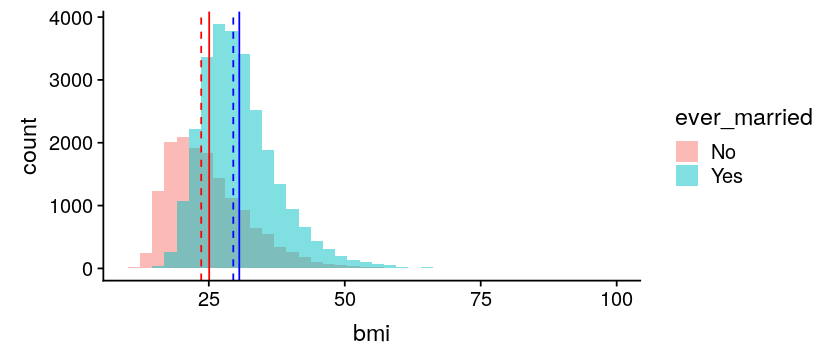

In [8]:
ggplot(Stroke_Data, aes(x = bmi, fill=ever_married)) +
    geom_histogram(bins = 40, alpha=.5, position="identity") +
    geom_vline(aes(xintercept=mean(Stroke_Data$bmi[Stroke_Data$ever_married == 'Yes'], na.rm = T)), 
               colour = "blue", size=0.5) +
    geom_vline(aes(xintercept=mean(Stroke_Data$bmi[Stroke_Data$ever_married == 'No'], na.rm = T)), 
               colour = "red", size=0.5) +
    geom_vline(aes(xintercept=median(Stroke_Data$bmi[Stroke_Data$ever_married == 'Yes'], na.rm = T)), 
               colour = "blue", linetype="dashed", size=0.5) +
    geom_vline(aes(xintercept=median(Stroke_Data$bmi[Stroke_Data$ever_married == 'No'], na.rm = T)), 
               colour = "red", linetype="dashed", size=0.5)+
    theme_bw()

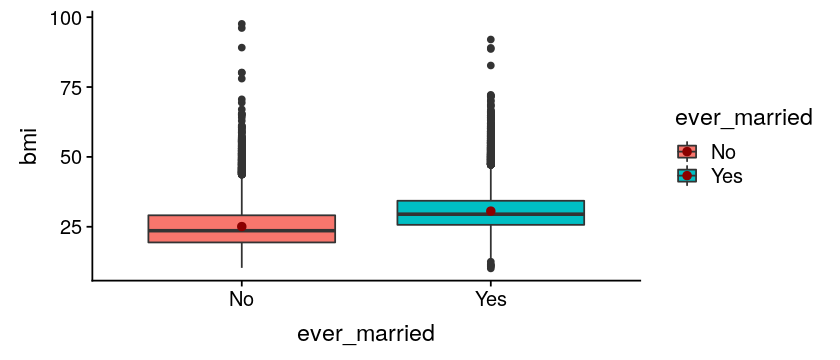

In [9]:
ggplot(Stroke_Data, aes(x = ever_married, y = bmi, fill=ever_married)) +
    geom_boxplot() +
    stat_summary(fun.y=mean, colour="darkred", geom="point", size=2)+
    theme_bw()

We can see that histogram is actually skewed to the right. The straight lines are the means, the dashed lines - medians. From the glimpse at this histogram it does look like people trend to gain weight in marriage (*or people with higher BMI are more likely to get married? That's a subject for another experiment :) *).

**Let's explore other variables in our dataset with respect to stroke outcome!**

In [10]:
summary(Stroke_Data)

    gender           age        hypertension heart_disease ever_married
 Female:24945   Min.   : 0.08   0:38261      0:40123       No :15150   
 Male  :16986   1st Qu.:24.00   1: 3670      1: 1808       Yes:26781   
 Other :    0   Median :43.00                                          
                Mean   :41.84                                          
                3rd Qu.:59.00                                          
                Max.   :82.00                                          
         work_type     Residence_type avg_glucose_level      bmi       
 Govt_job     : 5243   Rural:20930    Min.   : 55.00    Min.   :10.10  
 Never_worked :  176   Urban:21001    1st Qu.: 77.37    1st Qu.:23.20  
 Private      :23980                  Median : 91.32    Median :27.70  
 Self-employed: 6474                  Mean   :103.63    Mean   :28.61  
 children     : 6058                  3rd Qu.:111.48    3rd Qu.:32.90  
                                      Max.   :291.05    Max.   :

In [51]:
distribution_plot <- function(y){
    ## Function returns histogram and boxplot of choosen variable distribution by stroke outcome
    
    box_plt <- ggplot(Stroke_Data, aes(x=stroke, y = eval(parse(text = y)))) +
                geom_boxplot(aes(fill=stroke)) +
                stat_summary(fun.y=mean, colour="darkred", geom="point", size=2) +
                labs(x = "Stroke outcome",
                    y = y) +
                theme_bw()
    
    hstgm <- ggplot(Stroke_Data, aes(x = eval(parse(text = y)), fill=stroke)) +
                geom_histogram(bins = 40, alpha=.5, position="identity") +
                geom_vline(aes(xintercept=mean(Stroke_Data[[y]][Stroke_Data$stroke == 1], na.rm = T)), 
                   colour = "blue", size=0.5) +
                geom_vline(aes(xintercept=mean(Stroke_Data[[y]][Stroke_Data$stroke == 0], na.rm = T)), 
                   colour = "red", size=0.5) +
                geom_vline(aes(xintercept=median(Stroke_Data[[y]][Stroke_Data$stroke == 1], na.rm = T)), 
                   colour = "blue", linetype="dashed", size=0.5) +
                geom_vline(aes(xintercept=median(Stroke_Data[[y]][Stroke_Data$stroke == 0], na.rm = T)), 
                   colour = "red", linetype="dashed", size=0.5) +
                labs(x = y) +
                theme_bw()
        
    return(plot_grid(hstgm, box_plt))
}

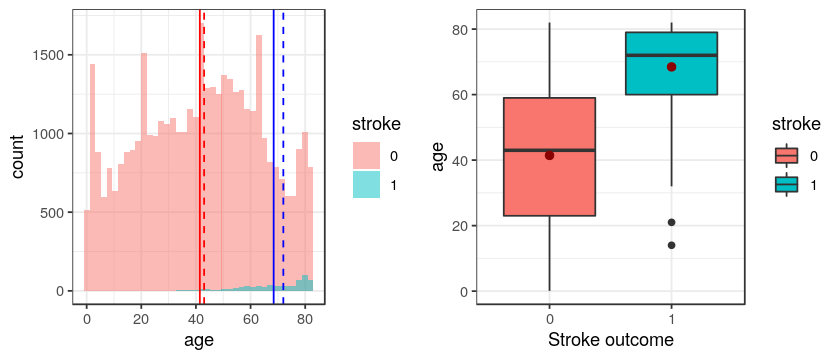

In [49]:
distribution_plot("age")

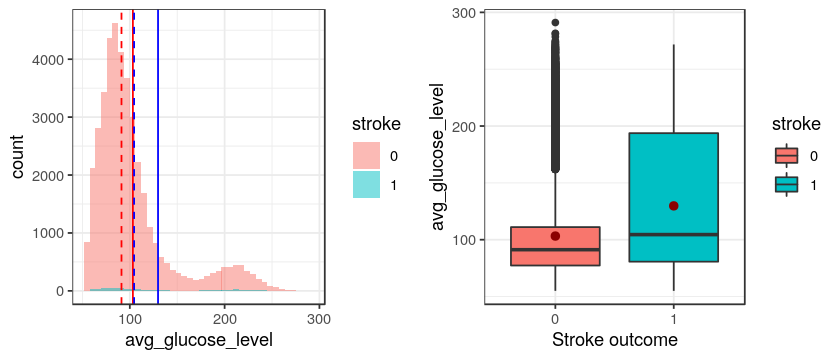

In [50]:
distribution_plot("avg_glucose_level")

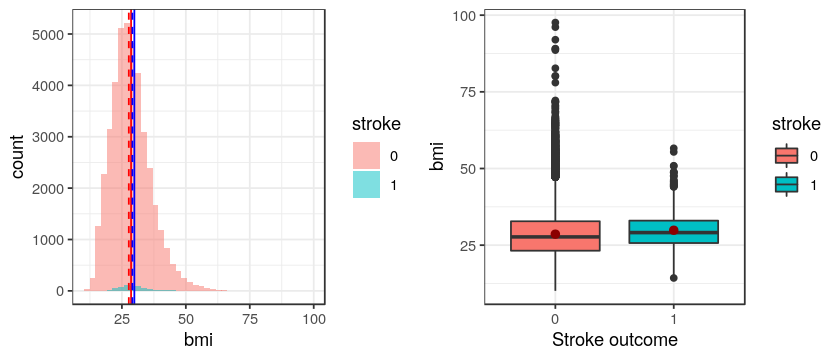

In [56]:
distribution_plot("bmi")

In [52]:
distribution_ratio  <- function(x){
    ## Function creates a stacked bar plots for stroke outcome and ratio by binomial variables (0/1)  
    plt <- Stroke_Data %>% 
            select(stroke, x, gender) %>%
            group_by(stroke, var = eval(parse(text = x))) %>% 
            summarise(count = length(gender)) %>%
            group_by(stroke) %>%
            mutate(ratio = round(count*100/sum(count), 1)) %>%
            ggplot(aes(y = ratio, x = stroke, fill = var)) + 
            geom_bar(stat="identity") +
            labs(title=paste0("Ratio of stroke outcome by ", x), fill = x) +
            theme_bw()
    return(plt)
}

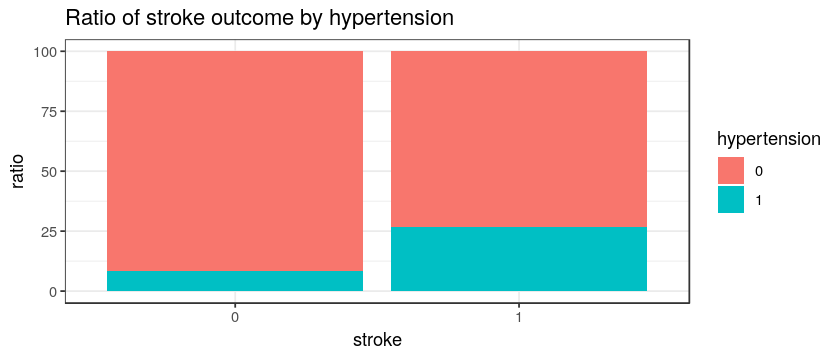

In [53]:
distribution_ratio("hypertension")

**Let's stop here for a moment and remember about discrete variables and probability.**

According to our sample we can make following assumptions:

In [26]:
H <- as.numeric(levels(Stroke_Data$hypertension))[Stroke_Data$hypertension]
S <- as.numeric(levels(Stroke_Data$stroke))[Stroke_Data$stroke]

p_SP_and_HP  <- mean(H&S)
p_SP_or_HP <- mean(H|S)
p_SP_and_HN <- mean(H&!S)

print(paste0("Probability of suffering from hypertension and having a stroke is: ", round(p_SP_and_HP, 3)))
print(paste0("Probability of suffering from hypertension or having a stroke is: ", round(p_SP_or_HP, 3)))
print(paste0("Probability of having a stroke without having a hypertension: ", round(p_SP_and_HN, 3)))

[1] "Probability of suffering from hypertension and having a stroke is: 0.004"
[1] "Probability of suffering from hypertension or having a stroke is: 0.099"
[1] "Probability of having a stroke without having a hypertension: 0.083"


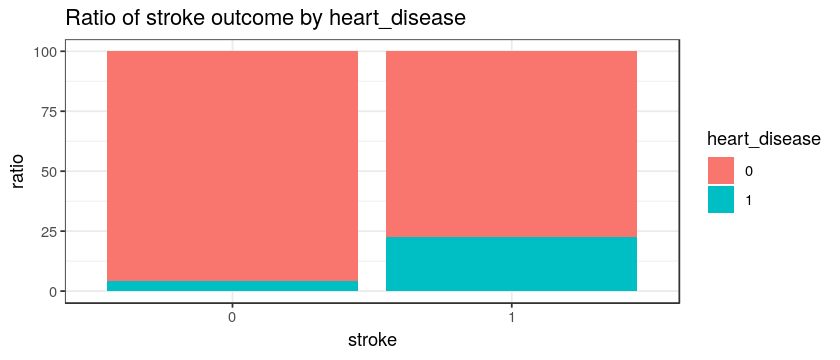

In [54]:
distribution_ratio("heart_disease")

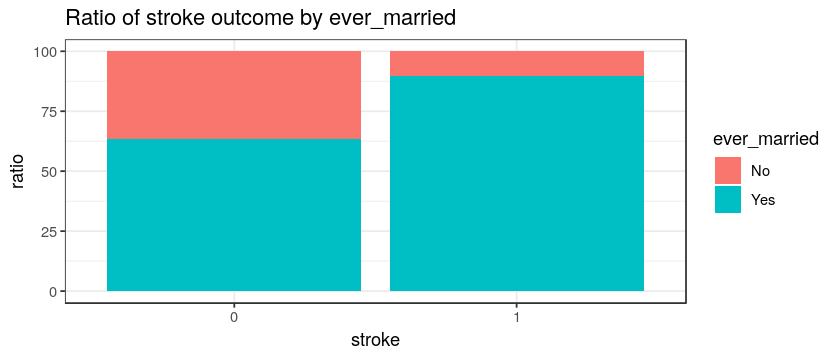

In [55]:
distribution_ratio("ever_married")

**Isn't it weird that stroke appeared more often to the people who have ever been married?**

### <a id='outcome'>Test Outcome Analysis</a> 

Now I will try to predict the **stroke** outcome with the help of **random forest**. I will not go into details about what is random forest, how it works and how to adjust the model. My point here is to show how can we analyse model performance (can be applied both for machine learning or real testings). You can check out my project on [Dementia Prediction with Tree-based Models](https://www.kaggle.com/ruslankl/dementia-prediction-w-tree-based-models) to know more about tree-based models.

In [58]:
frml <- (stroke~gender+age+hypertension+heart_disease+ever_married+work_type+Residence_type+avg_glucose_level+bmi)

model_rf <- randomForest(formula = frml, data = Stroke_Data)

prediction_rf <- predict(object = model_rf,
                         newdata = select(Stroke_Data, -stroke),
                         type = "class")

confusionMatrix(data = prediction_rf, reference = Stroke_Data$stroke) 

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 41288   403
         1     0   240
                                          
               Accuracy : 0.9904          
                 95% CI : (0.9894, 0.9913)
    No Information Rate : 0.9847          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5398          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.3733          
         Pos Pred Value : 0.9903          
         Neg Pred Value : 1.0000          
             Prevalence : 0.9847          
         Detection Rate : 0.9847          
   Detection Prevalence : 0.9943          
      Balanced Accuracy : 0.6866          
                                          
       'Positive' Class : 0               
                                          

**What assumptions we can make according to this test?**

* Probability that the test is positive given that the subject had a stroke (sensitivity) $P(T+|D+) = 1.0$.

* Probability that the test is negative given that the subject didn't have a stroke (specificity) $P(T-|D-) = 0.36$.

* Probability that the patient has the disease given that the test results are positive (Positive predicted values) $P(D+|T+)=0.99$.

* Probability that the patient doesn't have the disease given that the test results are negative (Negative predicted values) $P(D-|T-)=1.0$.

* Diagnostic likelihood ratio of a postive test
\begin{align}
DLR_+ = \frac{sensitivity}{1-specificity} = \frac{1}{1-0.36} = 1.56
\end{align}

* Diagnostic likelihood ratio of a negative test
\begin{align}
DLR_- = \frac{1-sensitivity}{specificity} = \frac{1-1}{0.36} = 0
\end{align}


In [75]:
print(paste0("AUC = ", round(Metrics::auc(actual = Stroke_Data$stroke, predicted = prediction_rf), 4)))

[1] "AUC = 0.6866"


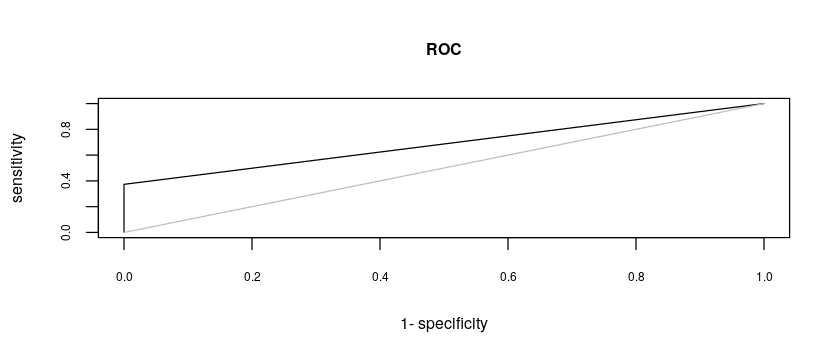

In [76]:
plot(roc(prediction_rf, Stroke_Data$stroke), main = "ROC", cex.axis=0.6, cex.main=0.8, cex.lab=0.8)

## <a id='nextpart'>What to Expect Next</a>

This was a tough task for me. I changed the workflow couple of times deciding what is most important to mention and what is not. I tried to make it more practical and less theoretical, but still I feel like there are a lot of theory and lack of examples.

Meanwhile I am working on the second part on following topics (which are my favorite): approximation results and confidence intervals, t-tests, hypothesis testing, ...

I would like to hear any feedback on what is should to me improved or what would you like to see in the next part.

**Thanks for your time! ;)**